       Lotarea  TotalBsmtSf  Garagearea  Overallqual  Overallcond  Fullbath  \
0     0.033420     0.140098    0.386460     0.666667        0.500  0.666667   
1     0.038795     0.206547    0.324401     0.555556        0.875  0.666667   
2     0.046507     0.150573    0.428773     0.666667        0.500  0.666667   
3     0.038561     0.123732    0.452750     0.666667        0.500  0.333333   
4     0.060576     0.187398    0.589563     0.777778        0.500  0.666667   
...        ...          ...         ...          ...          ...       ...   
1455  0.030929     0.155974    0.324401     0.555556        0.500  0.666667   
1456  0.055505     0.252373    0.352609     0.555556        0.625  0.666667   
1457  0.036187     0.188543    0.177715     0.666667        1.000  0.666667   
1458  0.039342     0.176432    0.169252     0.444444        0.625  0.333333   
1459  0.040370     0.205565    0.194640     0.444444        0.625  0.333333   

      Halfbath  BedroomAbvgr  TotRmsAbvgrd  firepla

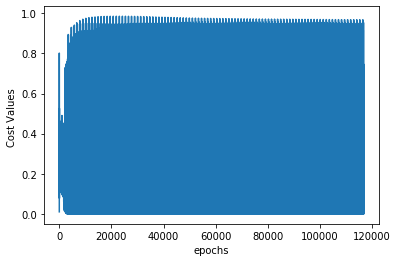

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def accuracy_score(c,t):
    return (c/t)*100


def sigmoid(y):
      return (1/(1+np.exp(-y)))
    
def sigmoid_derivative(x): 
      return sigmoid(x)*(1 - sigmoid(x)) 
    
def tanh_derivative(x):
    return 1/(np.cosh(x))**2

def binary_cross_entropy(t,y):
    return (t-y)**2

def normalize(max,min,x):
    return ((x-min)/(max-min))


df=pd.read_csv('housepricedata.csv')
Lotarea=[]
TotalBsmtSf=[]
Garagearea=[]
Overallqual=[]
Overallcond=[]
Fullbath=[]
Halfbath=[]
BedroomAbvgr=[]
TotRmsAbvgrd=[]
fireplaces=[]
for i in range(len(df)):
    Lotarea.append(normalize(df.LotArea.max(),df.LotArea.min(),df.LotArea[i]))
    TotalBsmtSf.append(normalize(df.TotalBsmtSF.max(),df.TotalBsmtSF.min(),df.TotalBsmtSF[i]))
    Garagearea.append(normalize(df.GarageArea.max(),df.GarageArea.min(),df.GarageArea[i]))
    Overallqual.append(normalize(df.OverallQual.max(),df.OverallQual.min(),df.OverallQual[i]))
    Overallcond.append(normalize(df.OverallCond.max(),df.OverallCond.min(),df.OverallCond[i]))
    Fullbath.append(normalize(df.FullBath.max(),df.FullBath.min(),df.FullBath[i]))
    Halfbath.append(normalize(df.HalfBath.max(),df.HalfBath.min(),df.HalfBath[i]))
    BedroomAbvgr.append(normalize(df.BedroomAbvGr.max(),df.BedroomAbvGr.min(),df.BedroomAbvGr[i]))
    TotRmsAbvgrd.append(normalize(df.TotRmsAbvGrd.max(),df.TotRmsAbvGrd.min(),df.TotRmsAbvGrd[i]))
    fireplaces.append(normalize(df.Fireplaces.max(),df.Fireplaces.min(),df.Fireplaces[i]))
    i+=1
Lotarea=pd.DataFrame(Lotarea,columns=['Lotarea'])
TotalBsmtSf=pd.DataFrame(data=TotalBsmtSf,columns=['TotalBsmtSf'])
Garagearea=pd.DataFrame(Garagearea,columns=['Garagearea'])
Overallqual=pd.DataFrame(Overallqual,columns=['Overallqual'])
Overallcond=pd.DataFrame(Overallcond,columns=['Overallcond'])
Fullbath=pd.DataFrame(Fullbath,columns=['Fullbath'])
Halfbath=pd.DataFrame(Halfbath,columns=['Halfbath'])
BedroomAbvgr=pd.DataFrame(BedroomAbvgr,columns=['BedroomAbvgr'])
TotRmsAbvgrd=pd.DataFrame(TotRmsAbvgrd,columns=['TotRmsAbvgrd'])
fireplaces=pd.DataFrame(fireplaces,columns=['fireplaces'])

df=df.drop(columns=['LotArea','TotalBsmtSF','GarageArea','OverallQual','OverallCond','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces'])
frames=[Lotarea,TotalBsmtSf,Garagearea,Overallqual,Overallcond,Fullbath,Halfbath,BedroomAbvgr,TotRmsAbvgrd,fireplaces,df]
df=pd.concat(frames,axis=1)
#df.rename(columns=0:"LotArea","0":"TotalBsmtSF","0":"GarageArea")
print(df)
df1=df.sample(frac=0.8,random_state=1011)
df2=df.drop(df1.index)
X_train=df1.drop(columns=['AboveMedianPrice'])
Y_train=df1['AboveMedianPrice']
X_test=df2.drop(columns='AboveMedianPrice')
Y_test=df2['AboveMedianPrice']
x_train=np.array(X_train)
print(x_train[0,:])
y_train=np.array(Y_train)

print(x_train)

#Initializations
M=7
w=np.random.rand(M,10)
v=np.random.rand(1,M)
wo=np.random.rand(M,1)
vo=np.random.rand(1,1)
k=0
i=0
epochs=[]
error_values=[]
error=[]
iterations=[]
alpha=0.1
for k in range(100):
    
    for i in range(len(x_train)):
        a=[]
        z=[]
        a=(x_train[i]).dot(w.T)+(wo.T)
        #print('a:',a)
        z=np.tanh(a)
        #print('z',z)
        z=np.array(z)
        y_in=(z).dot(v.T)+vo
        y=sigmoid(y_in)
        #print(y)
        error.append(np.asscalar(binary_cross_entropy(y_train[i],y)))
        err_corr_2=(y_train[i]-y)*(sigmoid_derivative(y))
        j=0
        vo=vo+(alpha)*(err_corr_2)
        err_corr_1=[]
        
        for j in range(M):
            v[:,j]=v[:,j]+(alpha)*(err_corr_2)*(z[:,j])
            err_corr_1.append((err_corr_2)*(v[:,j])*(tanh_derivative(z[:,j])))
            j+=1
        #print('err_1',err_corr_1[0])
        j=0
        l=0
        #print(w)
        for j in range(M):
            for l in range(10):
                w[j,l]=w[j,l]+alpha*((err_corr_1[j]))*(x_train[i,l])
                l=l+1
            wo[j]=wo[j]+(alpha)*(err_corr_1[j])
            j=j+1
        #print('w',w)
        i+=1
    
    #print('error:',error/len(X_train))
    print('epoch:',k)
    #error_values.append(np.asscalar(error/len(X_train)))
    epochs.append(k)
    k+=1
for i in range(len(x_train)*k):
    iterations.append(i)
    i+=1
plt.plot(iterations,(error))
plt.ylabel("Cost Values ")
plt.xlabel("epochs")
plt.show()          


In [30]:
i=0
x_test=np.array(X_test)
y_test=np.array(Y_test)
y=[]
for i in range(len(X_test)):
    a=[]
    z=[]
    a=(x_test[i]).dot(w.T)+(wo.T)
    #print('a:',a)
    z=np.tanh(a)
    #print('z',z)
    z=np.array(z)
    y_in=(z).dot(v.T)+vo
    y.append(np.asscalar(sigmoid(y_in)))
    #print(y)
    #print('w',w)
    i+=1
print(y) 


for i in range(len(y_test)):
    if y[i]<0.5:
        y[i]=0
    elif y[i]>0.5:
        y[i]=1
    i+=1
print(y)  
print(y_test)  
sum=0

for i in range(len(y_test)):
    if y[i]==y_test[i]:
        sum+=1
    i=i+1

print('sum:',sum)
print('accuracy_score', accuracy_score(sum,len(y_test)))

[0.9269119345204477, 0.9673577012827518, 0.06435402020741932, 0.01403170977839043, 0.5849499283918688, 0.9467404093711083, 0.016297016406467326, 0.9412297863289005, 0.015743723532687465, 0.014563717801301588, 0.9671152586383424, 0.7702683850568548, 0.021403298013656404, 0.8761191338270653, 0.8427186213688432, 0.9675613806797597, 0.015041131463897335, 0.9027623044069748, 0.020916074233367707, 0.9423189704533155, 0.9682368445762435, 0.08660757836070634, 0.015485175563676866, 0.9647964390581302, 0.9631013268448917, 0.013900269456956684, 0.09063390653201489, 0.9387229642156265, 0.8396611333755608, 0.1735766551523817, 0.3647819034021264, 0.9442161136646048, 0.9697695657280792, 0.9672471764503361, 0.0429017035759003, 0.9560409538108723, 0.050920695771731944, 0.9509009227771156, 0.015546632507229829, 0.9633911658440053, 0.968993616537639, 0.01580740024970303, 0.9278610302600089, 0.01351518671561134, 0.9610556583927695, 0.9575703903671692, 0.907066855247508, 0.8768339740221387, 0.9690729616764

In [7]:
print(X_test[0].shape)

KeyError: 0

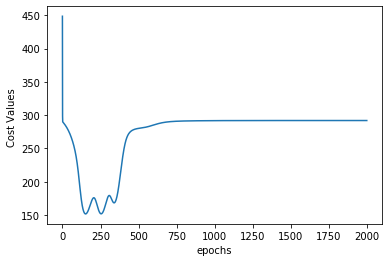

In [4]:
plt.plot(epochs,error_values)
plt.ylabel("Cost Values ")
plt.xlabel("epochs")
plt.show()  

In [ ]:
#normalization partially

Lotarea=[]
TotalBsmtSf=[]
Garagearea=[]
for i in range(len(df)):
    Lotarea.append(normalize(df.LotArea.max(),df.LotArea.min(),df.LotArea[i]))
    TotalBsmtSf.append(normalize(df.TotalBsmtSF.max(),df.TotalBsmtSF.min(),df.TotalBsmtSF[i]))
    Garagearea.append(normalize(df.GarageArea.max(),df.GarageArea.min(),df.GarageArea[i]))
    i+=1
Lotarea=pd.DataFrame(Lotarea,columns=['Lotarea'])
TotalBsmtSf=pd.DataFrame(data=TotalBsmtSf,columns=['TotalBsmtSf'])
Garagearea=pd.DataFrame(Garagearea,columns=['Garagearea'])
df=df.drop(columns=['LotArea','TotalBsmtSF','GarageArea'])
frames=[Lotarea,TotalBsmtSf,Garagearea,df]
df=pd.concat(frames,axis=1)




(-t*(np.log(y))-(1-t)*(np.log((1-y))))